In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

-- Instaling Yahoo Finance API


In [2]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=516e42f677ddcdc91ac4e4f69852efd8af7f9535399124ddb3c0880da2a13c84
  Stored in directory: /tmp/pip-ephem-wheel-cache-pat8yrzg/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


-- Connecting to Google Drive


 * The files will be save on GDrive

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/Sirajcourse"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Sirajcourse


Import data from Yfinance

In [4]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
df_full = pdr.get_data_yahoo("HPQ", start="2018-10-01").reset_index()
df_full.to_csv('HPQ.csv',index=False)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-01,25.799999,25.98,25.530001,25.600000,25.001904,8571800
1,2018-10-02,25.600000,26.15,25.600000,26.080000,25.470690,14379900
2,2018-10-03,26.200001,26.34,25.969999,26.059999,25.451157,8714400
3,2018-10-04,26.889999,27.08,26.219999,26.420000,25.802746,12955500
4,2018-10-05,26.270000,26.43,25.219999,25.340000,24.747980,15682400


In [0]:
df_full = pd.read_csv('HPQ.csv')

In [6]:
df= df_full.copy()
name = 'Turtle Trading Agent'
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['Close']
signals['RollingMax'] = (signals.trend.shift(1).rolling(count).max())
signals['RollingMin'] = (signals.trend.shift(1).rolling(count).min())
signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = -1
signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = 1
signals

,signal,trend,RollingMax,RollingMin
0,0.0,25.600000,NaN,NaN
1,0.0,26.080000,NaN,NaN
2,0.0,26.059999,NaN,NaN
3,0.0,26.420000,NaN,NaN
4,0.0,25.340000,NaN,NaN
5,0.0,25.010000,NaN,NaN
6,0.0,24.969999,NaN,NaN
7,0.0,24.260000,NaN,NaN
8,0.0,23.010000,NaN,NaN
9,0.0,23.670000,NaN,NaN


Predictions

In [0]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 1000,
    max_buy = 1,
    max_sell = 1,
):
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [9]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['signal'])

day 28: cannot sell anything, inventory 0
day 36: buy 1 units at price 22.610001, total balance 977.389999
day 38: buy 1 units at price 22.510000, total balance 954.879999
day 51: buy 1 units at price 22.290001, total balance 932.589998
day 52: buy 1 units at price 22.010000, total balance 910.579998
day 53: buy 1 units at price 21.420000, total balance 889.159998
day 54: buy 1 units at price 21.410000, total balance 867.749998
day 55: buy 1 units at price 20.549999, total balance 847.199999
day 56: buy 1 units at price 20.070000, total balance 827.129999
day 57: buy 1 units at price 19.650000, total balance 807.479999
day 58: buy 1 units at price 19.379999, total balance 788.100000
day 78, sell 1 units at price 21.770000, investment 12.332307 %, total balance 809.870000,
day 79, sell 1 units at price 22.100000, investment 14.035094 %, total balance 831.970000,
day 82, sell 1 units at price 22.200001, investment 14.551095 %, total balance 854.170001,
day 84, sell 1 units at price 22.26

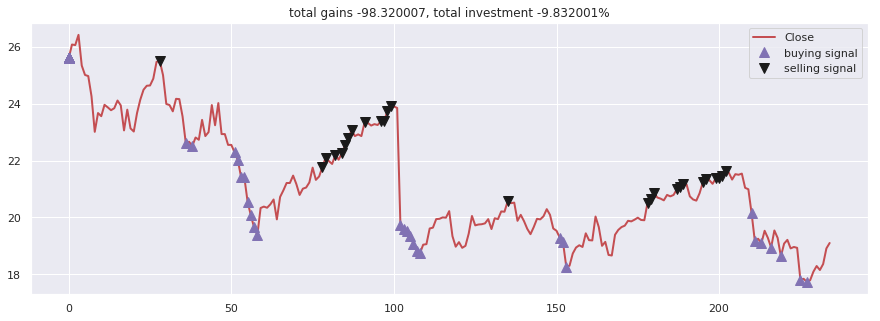

In [10]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.savefig(''+name+'.png')
plt.show()